# Exercício PA1-2

Exercício com data de entrega para 28 de setembro de 2020.


Aluno: Noé de Lima Bezerra

<noe_lima@id.uff.br>

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Math, Image
sp.init_printing(use_latex='mathjax',latex_mode='equation*')

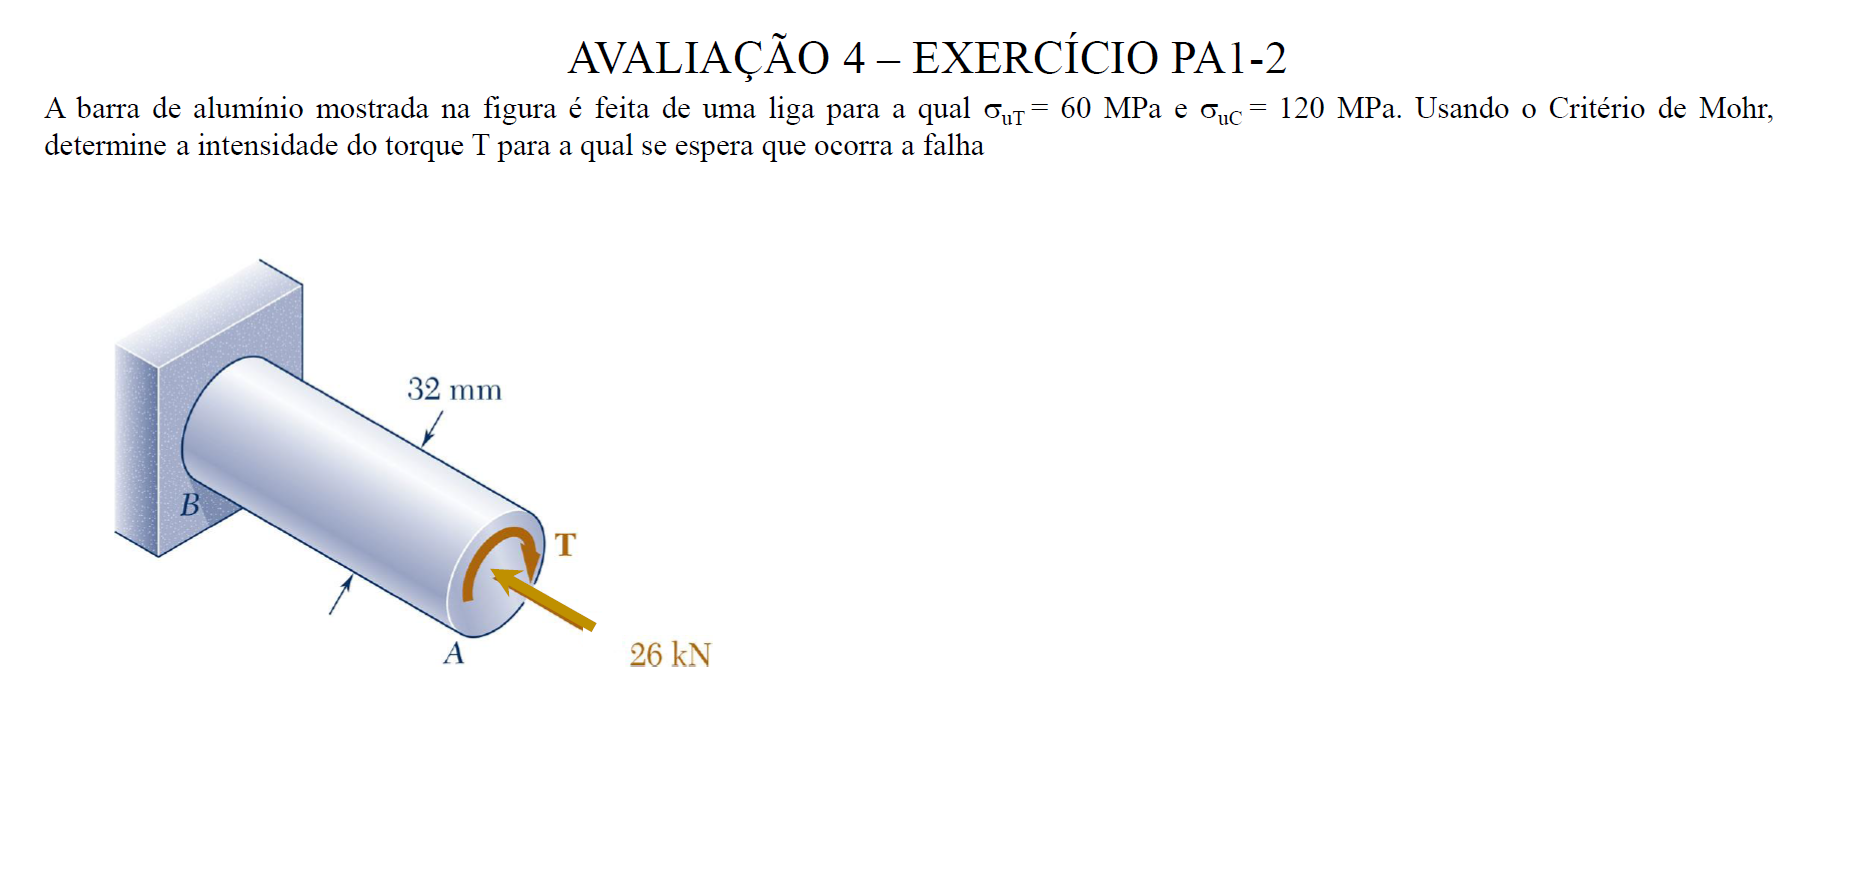

In [2]:
Image("Figuras/PA1-2.png")

# Solução

## Esforços Solicitantes

Na seção $S$, vista pelo lado direito, temos os seguintes esforços solicitantes:

In [4]:
mm,N,MPa = sp.symbols("mm,N,MPa")
kN = 1000*N

In [6]:
T,tau_xy,J,r, = sp.symbols("T,tau_xy,J,r")
P = -26*kN
d = 32*mm
A = np.pi*(d**2)/4
Jc = np.pi*(d**4)/32
sigma_x = (P/A).subs(N/(mm**2),MPa)
sigma_y = 0
display(sigma_x,sigma_y)

-32.3283478155412⋅MPa

0

In [7]:
eqtau = sp.Eq(tau_xy, T*r/J)
display(eqtau)

       T⋅r
τ_xy = ───
        J 

## Cálculo da Área Total

In [4]:
A = 150*75 - (150-13)*(75-26)
display(Math(r'A = %d~mm^{2}' % A))

<IPython.core.display.Math object>

## Momentos de Inércia Estáticos

\begin{equation*}
    I_{y} = \frac{13\times 49^{3}}{12} + 2\times \left[\frac{150\times 13^{3}}{12} + 150\times 13\times 31^{2}\right]
\end{equation*}

\begin{equation*}
    I_{z} = \frac{2\times 13\times 150^{3}}{12} + \frac{49\times 13^{3}}{12}
\end{equation*}

In [5]:
Iy = 13*(49**3)/12 + 2*(150*(13**3)/12 + 150*13*31**2)
display(Math(r'I_{y} = %.2f\times 10^{6} mm^{4}' % (Iy/1e6)))
Iz = 2*13*(150**3)/12 + 49*(13**3)/12
display(Math(r'I_{z} = %.2f\times 10^{6} mm^{4}' % (Iz/1e6)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Círculo de Mohr

In [6]:
def mohr(s_x,s_y,t_xy):
    if t_xy == 0:
        t_xy = 1e-10  # Evitar divisão por zero!
    z = np.linspace(0,360,360)
    r = np.sqrt((((s_x-s_y)/2)**2)+t_xy**2)
    s_med = ((s_x+s_y)/2)
    tg2tc = -(s_x-s_y)/(2*t_xy)
    tg2tp = -1/(tg2tc)
    tc = np.degrees(np.arctan(tg2tc)/2)
    tp = np.degrees(np.arctan(tg2tp)/2)
    x = s_med + r*np.cos(np.radians(z))
    y = r*np.sin(np.radians(z))
    a = ([s_x,s_x,s_y,s_y,s_x])
    b = ([0,t_xy,-t_xy,0,0])
    # Plot
    text = '\n'.join((
        r'$\sigma_{min} = %.1f~MPa$' % (s_med-r,),
        r'$\sigma_{max} = %.1f~MPa$' % (s_med+r,),
        r'$\tau_{max} = %.1f~MPa$' % (r,),
        r'$\theta_{p} = %.0f^{o}$' % (tp,),
        r'$\theta_{c} = %.0f^{o}$' % (tc,)
    ))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.plot(a,b,x,y)
    plt.xlabel(r"$\sigma$", size=18)
    plt.ylabel(r"$\tau$", size=18)
    plt.title("Círculo de Mohr")
    plt.text(s_med-1.6*r,r,text, fontsize=12, verticalalignment='top', bbox=props)
    plt.axis("equal")
    plt.show()

## Ponto $a$

### Tensão Normal $\sigma_{x}$

\begin{equation*}
    \sigma_{x} = \frac{N}{A} - \frac{M_{z}y}{I_{z}} + \frac{M_{y}z}{I_{y}}
\end{equation*}

In [7]:
sigma_xa = N/A - (Mz*(-75)/Iz) + (My*37.5/Iy)
display(Math(r'\sigma_{xa} = %.2f~MPa' % sigma_xa))

<IPython.core.display.Math object>

### Tensão Normal $\sigma_{y}$

Como não há força comprimindo ou tracionando na direção $y$, temos, diretamente:

In [8]:
sigma_ya = 0
display(Math(r'\sigma_{ya} = %d' % sigma_ya))

<IPython.core.display.Math object>

### Tensão Cisalhante $\tau_{xy}$

\begin{equation*}
    \tau = \frac{T}{2t\bar{A}} + \frac{V_{z}Q_{y}}{bI_{y}} + \frac{V_{y}Q_{z}}{bI_{z}}
\end{equation*}

In [9]:
tau_xya = 0
display(Math(r'\tau_{xya} = %d' % tau_xya))

<IPython.core.display.Math object>

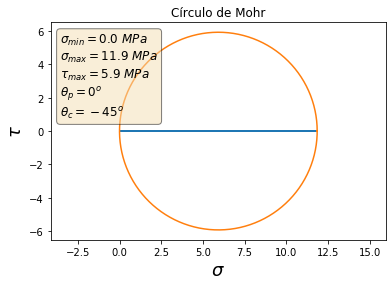

In [10]:
mohr(sigma_xa,sigma_ya,tau_xya)

## Ponto $b$

### Tensão Normal $\sigma_{x}$

In [11]:
sigma_xb = N/A - (Mz*(-15)/Iz) + (My*37.5/Iy)
display(Math(r'\sigma_{xb} = %.2f~MPa' % sigma_xb))

<IPython.core.display.Math object>

### Tensão Normal $\sigma_{y}$

Como não há força comprimindo ou tracionando na direção $y$, temos, diretamente:

In [12]:
sigma_yb = 0
display(Math(r'\sigma_{yb} = %d' % sigma_yb))

<IPython.core.display.Math object>

### Tensão Cisalhante $\tau_{xy}$

\begin{equation*}
    Q_{zb} = A'\cdot \bar{y} = \left(60\times 13\right)\left(30+15\right)
\end{equation*}

In [13]:
Qzb = (60*13)*(30+15)
display(Math(r'Q_{zb} = %.2f~mm^{3}' % Qzb))

<IPython.core.display.Math object>

\begin{equation*}
    Q_{yb} = A'\cdot \bar{z} = \left(60\times 13\right)\left(37,5-6,5\right)
\end{equation*}

In [14]:
Qyb = (60*13)*(37.5-6.5)
display(Math(r'Q_{yb} = %.2f~mm^{3}' % Qyb))

<IPython.core.display.Math object>

\begin{equation*}
    \tau = \frac{T}{2t\bar{A}} + \frac{V_{z}Q_{y}}{bI_{y}} + \frac{V_{y}Q_{z}}{bI_{z}}
\end{equation*}

In [15]:
tau_xyb = Tx/(26*A) + Vz*Qyb/(13*Iy) - Vy*Qzb/(13*Iz)
display(Math(r'\tau_{xyb} = %.2f~MPa' % tau_xyb))

<IPython.core.display.Math object>

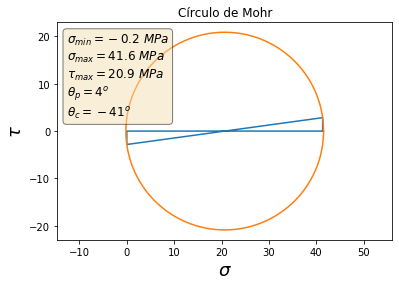

In [16]:
mohr(sigma_xb,sigma_yb,tau_xyb)

## Ponto $d$

### Tensão Normal $\sigma_{x}$

In [17]:
sigma_xd = N/A - (Mz*(15)/Iz) + (My*37.5/Iy)
display(Math(r'\sigma_{xd} = %.2f~MPa' % sigma_xd))

<IPython.core.display.Math object>

### Tensão Normal $\sigma_{y}$

Como não há força comprimindo ou tracionando na direção $y$, temos, diretamente:

In [18]:
sigma_yd = 0
display(Math(r'\sigma_{yd} = %d' % sigma_yd))

<IPython.core.display.Math object>

### Tensão Cisalhante $\tau_{xy}$

\begin{equation*}
    \bar{d}_{yb} = \frac{2\times 13\times 60\times \left(30+15\right)}{2\times 13\times 60}
\end{equation*}

\begin{equation*}
    Q_{zd} = A'\cdot \bar{y} = \left(60\times 13\right)\left(-30-15\right)
\end{equation*}

In [19]:
Qzd = (60*13)*(-30-15)
display(Math(r'Q_{zd} = %.2f~mm^{3}' % Qzd))

<IPython.core.display.Math object>

\begin{equation*}
    Q_{yd} = A'\cdot \bar{z} = \left(60\times 13\right)\left(37,5-6,5\right)
\end{equation*}

In [20]:
Qyd = (60*13)*(37.5-6.5)
display(Math(r'Q_{yd} = %.2f~mm^{3}' % Qyd))

<IPython.core.display.Math object>

\begin{equation*}
    \tau = \frac{T}{2t\bar{A}} + \frac{V_{z}Q_{y}}{bI_{y}} + \frac{V_{y}Q_{z}}{bI_{z}}
\end{equation*}

In [21]:
tau_xyd = Tx/(26*A) + Vz*Qyb/(13*Iy) + Vy*Qzb/(13*Iz)
display(Math(r'\tau_{xyd} = %.2f~MPa' % tau_xyd))

<IPython.core.display.Math object>

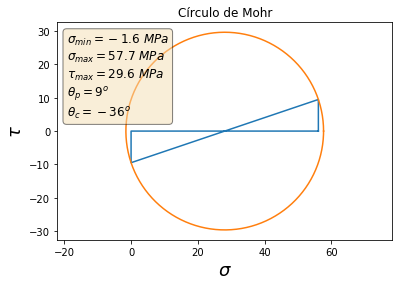

In [22]:
mohr(sigma_xd,sigma_yd,tau_xyd)

## Ponto $e$

### Tensão Normal $\sigma_{x}$

\begin{equation*}
    \sigma_{x} = \frac{N}{A} - \frac{M_{z}y}{I_{z}} + \frac{M_{y}z}{I_{y}}
\end{equation*}

In [23]:
sigma_xe = N/A - (Mz*(75)/Iz) + (My*37.5/Iy)
display(Math(r'\sigma_{xe} = %.2f~MPa' % sigma_xe))

<IPython.core.display.Math object>

### Tensão Normal $\sigma_{y}$

Como não há força comprimindo ou tracionando na direção $y$, temos, diretamente:

In [24]:
sigma_ye = 0
display(Math(r'\sigma_{ye} = %d' % sigma_ye))

<IPython.core.display.Math object>

### Tensão Cisalhante $\tau_{xy}$

\begin{equation*}
    \tau = \frac{T}{2t\bar{A}} + \frac{V_{z}Q_{y}}{bI_{y}} + \frac{V_{y}Q_{z}}{bI_{z}}
\end{equation*}

In [25]:
tau_xye = 0
display(Math(r'\tau_{xye} = %d' % tau_xye))

<IPython.core.display.Math object>

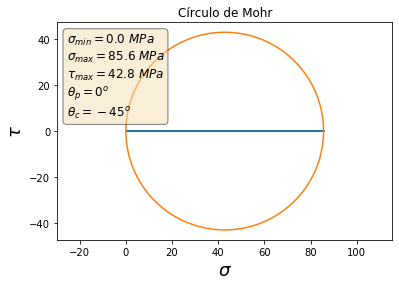

In [26]:
mohr(sigma_xe,sigma_ye,tau_xye)